In [1]:
from lighter.utils.runner import parse_config
from lighter.utils.dynamic_imports import import_module_from_path

import os
from monai.visualize import blend_images
import matplotlib.pyplot as plt
import numpy as np
import torch

# Change directory to the experiment folder
os.chdir("/home/suraj/Repositories/FM-extractors-radiomics/pyramid_pretraining")

In [2]:
os.getcwd()

'/home/suraj/Repositories/FM-extractors-radiomics/pyramid_pretraining'

In [3]:
kwargs = {
    "config": ["./experiments/base.yaml", "./experiments/frameworks/intrasample_simclr.yaml", "./experiments/backbones/segresenc.yaml"],
    "vars#name": 'baseline',
    "vars#project": 'test',
    "vars#wandb_group": ""
}
# Parse and validate the config.
parser = parse_config(**kwargs)

# Import the project folder as a module, if specified.
project = parser.get_parsed_content("project")
if project is not None:
    import_module_from_path("project", project)


2025/02/06 13:50:09.116  |  ℹ️  INFO      |                                                    ]8;id=481148;file:///home/suraj/miniconda3/envs/lighter_dev/lib/python3.10/site-packages/lighter/utils/dynamic_imports.py\dynamic_imports.py]8;;\:]8;id=191539;file:///home/suraj/miniconda3/envs/lighter_dev/lib/python3.10/site-packages/lighter/utils/dynamic_imports.py#79\79]8;;\
/home/suraj/Repositories/FM-extractors-radiomics/pyramid_pretraining imported as 'project'                         
module.                                                                                                            

In [4]:

def dataset_item_generator(item):
    if isinstance(item, list) or isinstance(item, tuple):
        for sub_item in item:
            if sub_item is None:
                continue
            elif isinstance(sub_item, list) or isinstance(sub_item, tuple):
                yield from dataset_item_generator(sub_item)
            else:
                yield sub_item
    elif isinstance(item, dict):
        for key, value in item.items():
            if value is None:
                continue
            elif isinstance(value, list) or isinstance(value, tuple):
                yield from dataset_item_generator(value)
            else:
                yield value
    else:
        yield item

        


In [5]:
train_dataset = parser.get_parsed_content("system#datasets#train")


In [6]:
# val_dataset = parser.get_parsed_content("system#datasets#val")
# predict_dataset = parser.get_parsed_content("system#datasets#predict")

In [7]:
len(train_dataset)

39436

In [8]:

def plot_3d_image(ret):
    # Plot axial slice
    plt.figure(figsize=(10, 10))
    plt.subplot(3, 1, 1)
    plt.imshow(ret[:, ret.shape[1] // 2, :, :].permute(1, 2, 0), cmap="gray")
    plt.title("Axial")
    plt.axis("off")

    # Plot sagittal slice
    plt.subplot(3, 1, 2)
    plt.imshow(ret[:, :, ret.shape[2] // 2, :].permute(1, 2, 0), cmap="gray")
    plt.title("Coronal")
    plt.axis("off")

    # Plot coronal slice
    plt.subplot(3, 1, 3)
    plt.imshow(ret[:, :, :, ret.shape[3] // 2].permute(1, 2, 0), cmap="gray")
    plt.title("Sagittal")

    plt.axis("off")
    plt.show()

In [ ]:
dataset_idx = 9
dataset_item = train_dataset[dataset_idx]

# Recursively get the first valid item
g = dataset_item_generator(dataset_item)            

for item in g:
    if isinstance(item, dict):
        for k, v in item.items():
            if isinstance(v, torch.Tensor):
                print(k, v.shape)
                if len(v.shape) == 4:
                    plot_3d_image(v)
                else:
                    plt.imshow(v[0])
                    plt.show()
            else:
                print(v)
    elif isinstance(item, torch.Tensor) or isinstance(item, np.ndarray):
        if len(item.shape) == 4:
            # item = item.transpose(0, 3, 2, 1)
            item = torch.tensor(item)
            plot_3d_image(item)
        else:
            plt.imshow(item[0])
            plt.show()
        

Data statistics:
Type: <class 'str'> None
Shape: None
Value range: (not a PyTorch or Numpy array, type: <class 'str'>)
Value: /mnt/data1/datasets/ULS23/images/novel_data/ULS23_DeepLesion3D/images/000010_02_02_100_lesion_01.nii.gz


2025/02/06 13:50:12.391  |  ℹ️  INFO      |  Data statistics:                                           ]8;id=101146;file:///home/suraj/miniconda3/envs/lighter_dev/lib/python3.10/site-packages/monai/transforms/utility/array.py\array.py]8;;\:]8;id=422568;file:///home/suraj/miniconda3/envs/lighter_dev/lib/python3.10/site-packages/monai/transforms/utility/array.py#733\733]8;;\
Type: <class 'str'> None                                                                                           
Shape: None                                                                                                        
Value range: (not a PyTorch or Numpy array, type: <class 'str'>)                                                   
Value:                                                                                                             
/mnt/data1/datasets/ULS23/images/novel_data/ULS23_DeepLesion3D/images/000010_02_02_100_lesion_01.nii.g             
z                                                                                                                  

Data statistics:
Type: <class 'pathlib.PosixPath'> None
Shape: None
Value range: (not a PyTorch or Numpy array, type: <class 'pathlib.PosixPath'>)
Value: /mnt/data1/datasets/ULS23/annotations/novel_data/ULS23_DeepLesion3D/labels/000010_02_02_100_lesion_01.nii.gz


2025/02/06 13:50:12.396  |  ℹ️  INFO      |  Data statistics:                                           ]8;id=57353;file:///home/suraj/miniconda3/envs/lighter_dev/lib/python3.10/site-packages/monai/transforms/utility/array.py\array.py]8;;\:]8;id=553091;file:///home/suraj/miniconda3/envs/lighter_dev/lib/python3.10/site-packages/monai/transforms/utility/array.py#733\733]8;;\
Type: <class 'pathlib.PosixPath'> None                                                                             
Shape: None                                                                                                        
Value range: (not a PyTorch or Numpy array, type: <class 'pathlib.PosixPath'>)                                     
Value:                                                                                                             
/mnt/data1/datasets/ULS23/annotations/novel_data/ULS23_DeepLesion3D/labels/000010_02_02_100_lesion_01.             
nii.gz                                                                                                             

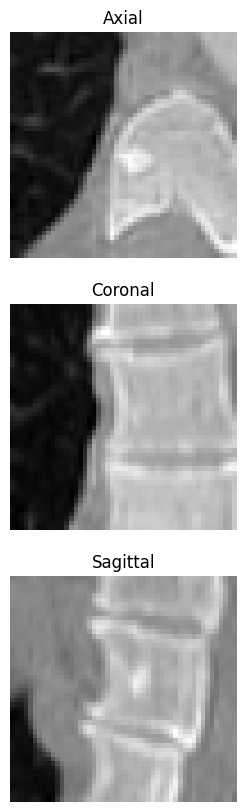

: 

In [9]:
plot_3d_image(train_dataset[0]['input'][0][0])

In [ ]:
set(np.unique(label).tolist()).intersection(set([6, 5, 4, 3, 2, 1, 22, 32, 31, 30, 29, 28, 27, 26, 25, 21, 20, 19, 18, 7]))

In [ ]:
dataset[idx]

In [ ]:
item["id"]

In [ ]:
from tqdm import tqdm
dataset = parser.get_parsed_content("system#datasets#train")
exclude_list = []
for i in tqdm(range(0, len(dataset))):
    try:
        out = dataset[i]
    except:
        exclude_list.append(i)

In [ ]:
exclude_list

In [ ]:
for exclude_idx in exclude_list:
    print(dataset.data[exclude_idx])

In [49]:
import pandas as pd
x = pd.read_csv("/mnt/data1/TotalSegmentator/v2/processed/meta.csv")

In [ ]:
x[~x['image_id'].isin(['s1275', 's1341', 's1268', 's1261'])]

In [ ]:
df